In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Import prep data

#High performing Employees
hperf_df = pd.read_csv('prep_data.csv')
hperf_df

,salary,satisfaction_level,time_spend_company,average_montly_hours,Work_accident,number_project,churn,last_evaluation,promotion_last_5years
0,2,0.80,6,262,0,5,1,0.86,0
1,2,0.11,4,272,0,7,1,0.88,0
2,1,0.72,5,223,0,5,1,0.87,0
3,1,0.92,5,259,0,5,1,0.85,0
4,1,0.89,5,224,0,5,1,1.00,0
...,...,...,...,...,...,...,...,...,...
4107,1,0.85,6,247,0,4,1,0.85,0
4108,1,0.89,5,228,1,5,1,0.88,0
4109,1,0.09,4,257,0,6,1,0.81,0
4110,1,0.76,6,293,0,6,1,0.83,0


In [6]:
df = pd.read_csv('/home/learner/Downloads/hr_data.txt')

In [8]:
#Non High performing employees
non_hperf = df[~((df['last_evaluation'] >= 0.80) & (df['number_project'] > 3))]
non_hperf

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
5,5,0.41,0.50,2,153,3,0,1,0,sales,low
6,6,0.10,0.77,6,247,4,0,1,0,sales,low
9,9,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14992,14992,0.40,0.48,2,155,3,0,1,0,support,low
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low


# Churn Rate much Higher Among High performing Employees

In [13]:
#Churn percentage among High performing Employees
hperf_df['churn'].value_counts(normalize = True)

0    0.589008
1    0.410992
Name: churn, dtype: float64

In [14]:
##Churn percentage among Non High performing Employees
non_hperf['churn'].value_counts(normalize = True)

0    0.827225
1    0.172775
Name: churn, dtype: float64

Text(0.5, 1.0, 'Churn Rate Among High Performing Employees')

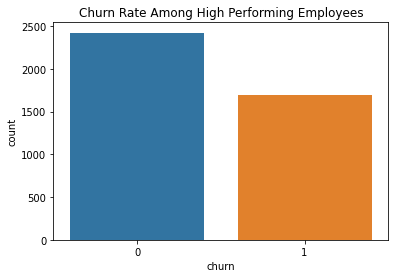

In [17]:
sns.countplot(hperf_df['churn'])
plt.title('Churn Rate Among High Performing Employees')

Text(0.5, 1.0, 'Churn Rate Among Non High Performing Employees')

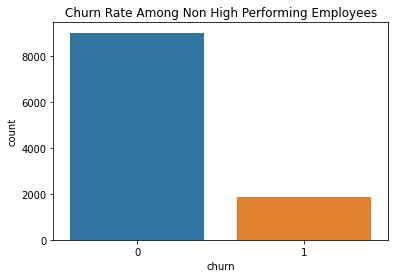

In [18]:
sns.countplot(non_hperf['churn'])
plt.title('Churn Rate Among Non High Performing Employees')

## Years 4 and 5 of Employment are critical for High Performing Employees

In [25]:
hperf_df['time_spend_company'].unique()

array([ 6,  4,  5,  3,  2,  8, 10,  7])

In [35]:
hperf_df[(hperf_df['time_spend_company'] == 6) & (hperf_df['churn'] == 1)].shape[0]

191

In [77]:
perf_churn = hperf_df[hperf_df['churn'] == 1]
perf_churn.shape

(1690, 10)

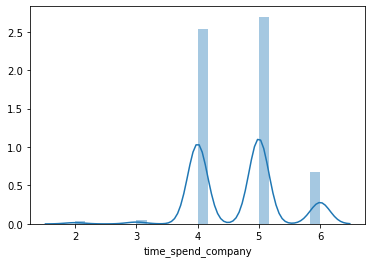

In [46]:
sns.distplot(perf_churn['time_spend_company'])

Text(0.5, 1.0, 'Churn Variation across Years')

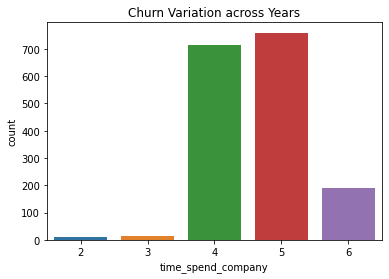

In [60]:
sns.countplot(perf_churn['time_spend_company'])
plt.title('Churn Variation across Years')

In [59]:
perf_churn['time_spend_company'].value_counts()

5    759
4    713
6    191
3     16
2     11
Name: time_spend_company, dtype: int64

## Good Hands are leaving just 20% satisfied

* 46% of churned staff were left 20% satisfied

In [64]:
hperf_df['satisfaction_level'].min()

0.09

In [72]:
def make_cat(x):
    if x <= 0.2:
        return('0 to 20')
    elif x <= 0.4:
        return('20 to 40')
    elif x <= 0.6:
        return('40 to 60')
    elif x <= 0.8:
        return('60 to 80')
    else:
        return('80 to 100')

In [71]:
make_cat(0.99)

'80 to 100'

In [73]:
hperf_df['satisfaction_percentage'] = hperf_df['satisfaction_level'].apply(make_cat)

In [76]:
hperf_df['satisfaction_percentage'].value_counts()

80 to 100    1288
60 to 80     1180
0 to 20       926
40 to 60      527
20 to 40      191
Name: satisfaction_percentage, dtype: int64

In [78]:
perf_churn['satisfaction_percentage'].value_counts()

0 to 20      775
80 to 100    524
60 to 80     358
20 to 40      21
40 to 60      12
Name: satisfaction_percentage, dtype: int64

Text(0.5, 1.0, 'Count of Employee Churn by percentage satisfaction')

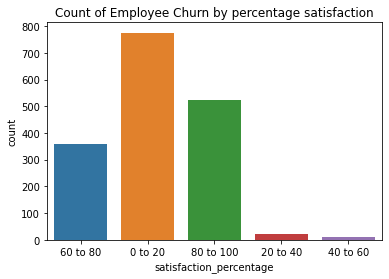

In [81]:
sns.countplot(perf_churn['satisfaction_percentage'])
plt.title('Count of Employee Churn by percentage satisfaction')

In [85]:
perf_churn['promotion_last_5years'].value_counts()

0    1689
1       1
Name: promotion_last_5years, dtype: int64

Text(0.5, 1.0, 'Count of Employee Churn by promotion')

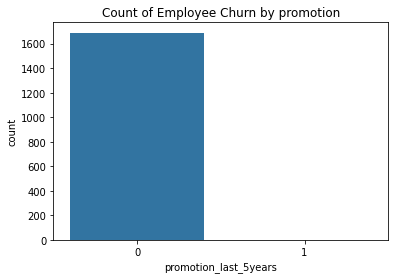

In [86]:
sns.countplot(perf_churn['promotion_last_5years'])
plt.title('Count of Employee Churn by promotion')